# **BM5371 Tıpta Yapay Zeka Uygulamaları Ödev 1**

In [ ]:
# Gerekli kütüphanelerin install edilmesi
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Kütüphanelerin import edilmesi
import imageio 
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import pydicom
import cv2
import os
from PIL import Image
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

In [ ]:
ls

bounding_boxes_2.jpg   deneme.png                orijinal_rgb.png
bounding_boxes.jpg     left_lung.jpg             rectangle_img.jpg
CR-MONO1-10-chest.dcm  maske.png                 sample_data/
crop.jpg               MR-MONO2-8-16x-heart.dcm  SON.png
crop_singlebbox.jpg    orijinal.png


# **1. CR (Computed Radiography) - CR-MONO1-10-chest Görüntüsü**

### 1.a. DICOM dosyasının okunması ve dosyanın içerdiği görüntünün boyutlarının yazdırılması




In [ ]:
# Sol kısımda bulunan dosya yöneticisine 1. görüntüyü .dcm uzantısı ile upload ederek bu ortamda kullanılmasını sağladım.
# CR-MONO1-10-chest.dcm görüntüsünün okunması
file_path = "CR-MONO1-10-chest.dcm"
medical_image = pydicom.read_file(file_path, force=True)

In [ ]:
medical_image.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
image = medical_image.pixel_array

In [ ]:
# Görüntü tipinin ve boyutunun yazdırılması
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(440, 440)


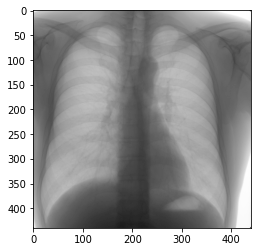

In [ ]:
# Görüntünün çizdirilmesi
plt.imshow(image, cmap='gray')

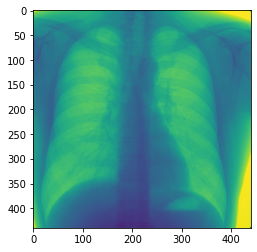

In [ ]:
plt.imshow(image)

### 1.b. Görüntüdeki piksellerin min ve maksimum değerlerinin yazdırılması

In [ ]:
print(image.min(), image.max())

0 979


### 1.c. Görüntüdeki piksellerin değerlerinin dağılımını gösteren histogram 

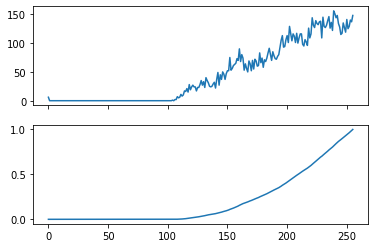

In [ ]:
# Histogram
hist = ndi.histogram(image, min=0, max=255, bins=256)

# Kümülatif dağılım fonksiyonu
cdf = hist.cumsum() / hist.sum()

# Histogram ve kümülatif dağılımın çizdirilmesi
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='Kümülatif Dağılım Fonksiyonu')

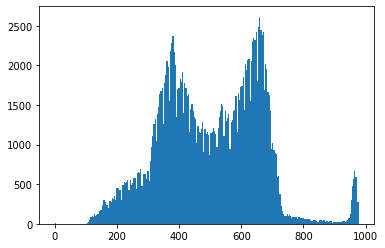

In [ ]:
ax = plt.hist(image.ravel(), bins = 256)
plt.show()

### 1.d. Kontrastı arttırılmış görüntünün ekranda gösterilmesi

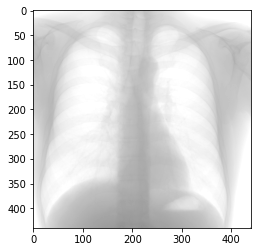

In [ ]:
# Görüntünün daha fazla kontrastla çizdirilmesi
plt.imshow(image, cmap='gray', vmin=-700, vmax=700)

### 1.e. Kontrastı arttırılmış görüntüdeki piksellerin değerlerinin dağılımını gösteren histogram

In [ ]:
im = Image.fromarray(np.uint8(image))

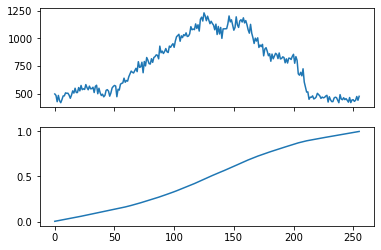

In [ ]:
# Histogram
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Kümülatif dağılım fonksiyonu
cdf = hist.cumsum() / hist.sum()

# Histogram ve kümülatif dağılımın çizdirilmesi
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='Kümülatif Dağılım Fonksiyonu')

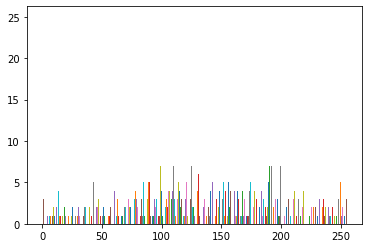

In [ ]:
ax = plt.hist(im, bins = 256)
plt.show()

### 1.f. DICOM dosyasında saklanan tüm metadatanın yazdırılması


In [ ]:
print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008, 0000) Group Length                        UL: 286
(0008, 0008) Image Type                          CS: 'ORIGINAL PRIMARY'
(0008, 0012) Instance Creation Date              DA: '1995.07.20'
(0008, 0013) Instance Creation Time              TM: '11:22:07'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9125.0.19950720112207
(0008, 0022) Acquisition Date                    DA: '1993.02.24'
(0008, 0032) Acquisition Time                    TM: '17:58:00'
(0008, 0050) Accession Number                    SH: 'FUJI95714'
(0008, 0060) Modality                            CS: 'CR'
(0008, 0070) Manufacturer                        LO: 'FUJI PHOTO FILM CO. LTD.'
(0008, 0080) Institution Name                    LO

### 1.g. Orijinal görüntüye Gaussian yumuşatma filtresi uygulanması

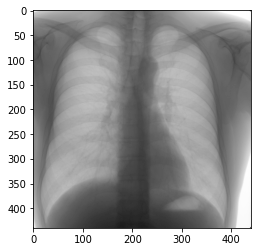

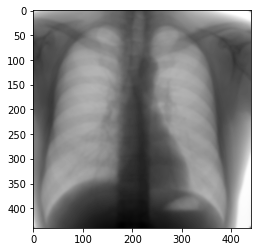

In [ ]:
# Gürültüyü azaltmak için görüntünün bulanıklaştırılması
blurred_image = skimage.filters.gaussian(image, sigma=2)

# Orijinal görüntü
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

# Gauss filtresi uygulandıktan sonra görüntünün gösterilmesi
fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

### 1.h. Gaussian filtresi uygulanmış görüntünün ikili (binary) görüntüye çevrilmesi

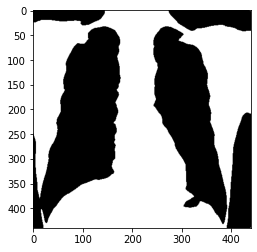

In [ ]:
# create a mask based on the threshold
t = 0.0081
#t = 0.007570761121066908
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

### 1.i. Gaussian filtresi uygulanmış görüntünün ikili (binary) görüntüye çevrilmesi ile elde edilen görüntüdeki siyah ve beyaz değerlerin ters çevrilmesi


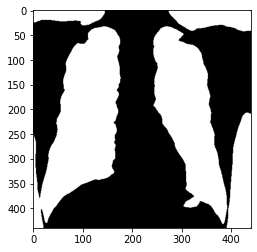

In [ ]:
# create a mask based on the threshold
#t = 0.00785381
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

### 1.j. Morfolojik işlemlerin uygulanması ve görüntünün kaydedilmesi


In [ ]:
from skimage import (
    filters, measure, morphology, segmentation
)

In [ ]:
# Binary erosion 
mask_erosion = ndi.binary_erosion(binary_mask,None,25).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# Binary closing 
mask_closing = ndi.binary_closing(binary_mask,None,20).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# Binary dilation 
mask_dilation = ndi.binary_dilation(binary_mask,None,23).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# Binary opening
mask = ndi.binary_opening(binary_mask,None,24).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


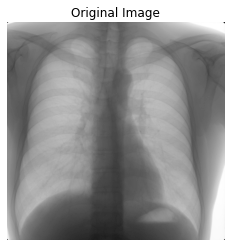

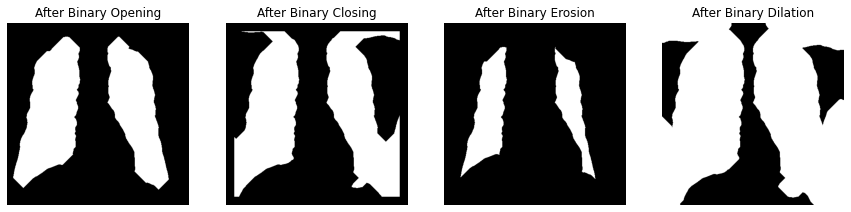

In [ ]:
masked_image = image * mask
plt.imshow(image,cmap="gray")
plt.title('Original Image')
plt.axis('off')
if display:
  plt.figure(figsize=(15, 5))
  plt.subplot(141)
  plt.imshow(mask,cmap="gray")
  plt.title('After Binary Opening')
  plt.axis('off')

  plt.subplot(142)
  plt.imshow(mask_closing,cmap="gray")
  plt.title('After Binary Closing')
  plt.axis('off')

  plt.subplot(143)
  plt.imshow(mask_erosion,cmap="gray")
  plt.title('After Binary Erosion')
  plt.axis('off')

  plt.subplot(144)
  plt.imshow(mask_dilation,cmap="gray")
  plt.title('After Binary Dilation')
  plt.axis('off')


In [ ]:
import matplotlib.image
matplotlib.image.imsave('maske.png', mask,cmap="gray")
matplotlib.image.imsave('orijinal.png', image,cmap="gray")
matplotlib.image.imsave('orijinal_rgb.png', image)

In [ ]:
ls

bounding_boxes_2.jpg   deneme.png                orijinal_rgb.png
bounding_boxes.jpg     left_lung.jpg             rectangle_img.jpg
CR-MONO1-10-chest.dcm  maske.png                 sample_data/
crop.jpg               MR-MONO2-8-16x-heart.dcm  SON.png
crop_singlebbox.jpg    orijinal.png


### 1.k. Düzeltilmiş maskenin dosyadaki orijinal görüntü üzerinde gösterilmesi (overlay)

True

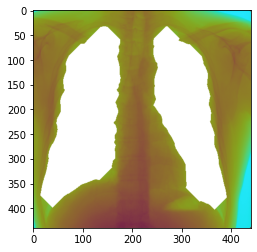

In [ ]:
img1 = cv2.imread('orijinal_rgb.png')  # Original image
img2 = cv2.imread('maske.png')          # binary mask image
result = img1.copy()

for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        result[i, j] = [255, 255, 255] if img2[i, j][0] == 255 else result[i, j]

plt.imshow(result)
cv2.imwrite('overlay.png', result)   # saves modified image to result.png

### 1.l. Düzeltilmiş maske kullanarak dosyadaki orijinal görüntüde sadece maskenin kapsadığı kısımların gösterilmesi.


Text(0.5, 1.0, 'Overlayed Image')

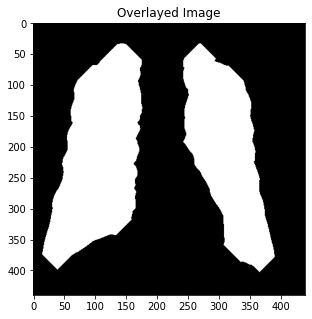

In [ ]:
# used in background
img1 = Image.open(r"orijinal.png")
  
# overlay image
img2 = Image.open(r"maske.png")
img1.paste(img2, (0,0), mask = img2)
  
# Displaying the image
plt.figure(figsize=(15, 5))
plt.imshow(img1,cmap="gray")
plt.title('Overlayed Image')

### 1.m. Düzeltilmiş maske kullanılarak bu maskeyi sınırlandıran bounding box çizilmesi ve crop edilerek saklanması (crop.jpg)

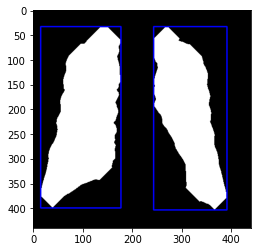

In [ ]:
import cv2
import numpy as np

# read image
img = cv2.imread('maske.png')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)[1]

# get contours
result = img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
 
# save resulting image
cv2.imwrite('crop.jpg',result)      

# show thresh and result    
plt.imshow(result,cmap="gray")

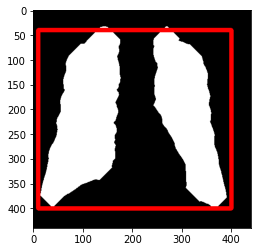

In [ ]:
# Draw bounding rectangle
start = (10, 400)
end = (400, 40)
colour = (255, 0, 0)
thickness = 7
rectangle_img = cv2.rectangle(img, start, end, colour, thickness)
cv2.rectangle(img, (100, 560), (700, 480),
              (0, 0, 255), 8)
plt.imshow(rectangle_img, cmap="gray")


In [ ]:
# save resulting image
cv2.imwrite('crop_singlebbox.jpg',rectangle_img) 

True

True

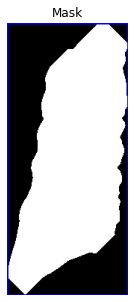

In [ ]:
new_img=result[y:y+h,x:x+w]
plt.figure(figsize=(15, 5))
plt.subplot(142)
plt.imshow(new_img,cmap="gray")
plt.title('Mask')
plt.axis('off')

# save resulting image
cv2.imwrite('left_lung.jpg',new_img)

# **2. MRI (Magnetic Resonance Imaging) - MR-MONO2-8-16x-heart Görüntüsü**

### 2.a. DICOM dosyasının okunması ve görüntünün boyutlarının yazdırılması

In [ ]:
import pydicom
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

file_path = "MR-MONO2-8-16x-heart.dcm"
medical_image = pydicom.read_file(file_path)

In [ ]:
image = medical_image.pixel_array
print(image.shape)

(16, 256, 256)


### 2.b. DICOM dosyasında saklanan tüm metadatanın yazdırılması

In [ ]:
print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 132
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 999.999.2.19960619.163000.1.103
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008, 0000) Group Length                        UL: 248
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19960619.163000.1.103
(0008, 0020) Study Date                          DA: '1995.06.26'
(0008, 0023) Content Date                        DA: '1995.06.26'
(0008, 0030) Study Time                          TM: '11:20:00

### 2.c. Dosyada saklanan görüntüden alınan her bir kesiti beraber gösteren bir figürün ekranda gösterilmesi.

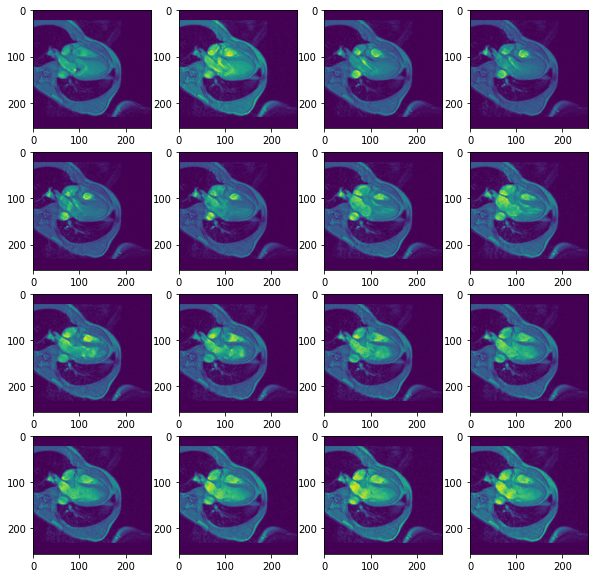

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image[i-1])
plt.show()

### 2.d. Axial görünümde herhangi bir kesitin gösterilmesi

In [ ]:
axial_image = image[:, :, 144] 

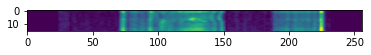

In [ ]:
plt.imshow(axial_image)

### 2.e. Sagittal görünümde herhangi bir kesitin gösterilmesi

In [ ]:
sagital_image = image[15, :] 

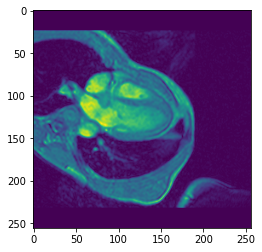

In [ ]:
plt.imshow(sagital_image)

### 2.f. Coronal görünümde herhangi bir kesitin gösterilmesi

In [ ]:
coronal_image = image[:, 144, :]

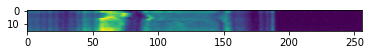

In [ ]:
plt.imshow(coronal_image)